Important notes:
- Linear slope equation: ŷ = α + x ⋅ β
- Slope: β = covariance(x,y) / variance (x)
- Intercept: α = ȳ ⋅ x̄ β

- MSE: (sum(Y_actual-ŷ)^2)/n

In [2]:
# import cell
import numpy as np

In [11]:
class LinearRegression:
    def __init__(self, lr: float = 0.001, n_iterations: int = 1000):
        self.lr = lr
        self.n_iterations = n_iterations
        # No weights and bias on initialization
        self.weights = None
        self.bias = None

    def fit(self, X: int, y: int):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0 

        for _ in range(self.n_iterations):
            y_pred = np.dot(X, self.weights) + self.bias

            # Gradient Descent
            dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
            db = (1/n_samples) * np.sum(y_pred - y)

            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db

    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias
        return y_pred

def MSE(y_test, pred):
    return np.mean((y_test - pred)**2)

With the model done, we test for its functionality.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
from matplotlib import pyplot as plt

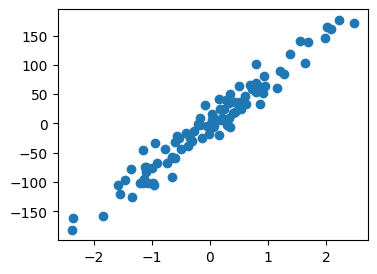

In [8]:
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

fig = plt.figure(figsize=(4,3))
plt.scatter(X[:,0], y, marker="o")
plt.show()

In [15]:
lin_model = LinearRegression(lr= 0.01)
lin_model.fit(X_train, y_train)
predictions = lin_model.predict(X_test)

MSE_value = MSE(y_test, predictions)
print(f"MSE: {MSE_value}")

MSE: 325.7197246718065


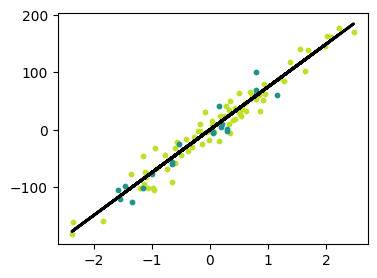

In [16]:
# Visualize the results
y_pred_line = lin_model.predict(X)

cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(4, 3))

m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)

plt.plot(X, y_pred_line, color='black', linewidth=2, label='Prediction')
plt.show()
